# Comparing Dropout for large models

In [33]:
import wandb
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
# Set Default fig size
plt.rcParams['figure.figsize'] = [10, 6]

In [34]:
api = wandb.Api()
runs = api.runs("zeb/dropout")

data = []
for run in runs:
    config = run.config
    metrics = run.summary_metrics
    # Check if 'num_params' in config
    if 'num_params' not in config:
        config['num_params'] = 634368
    if 'num_train_examples' not in config:
        config['num_train_examples'] = config['dataset']['num_examples']
    data.append({**config, **metrics})
print(config['dataset'])

df = pd.DataFrame(data)

params_map = {4817664 : '5M', 85291776 : '85M', 634368 : '600k'}

{'name': 'transformersegmentation/CHILDES', 'max_age': 120, 'subconfig': 'English', 'num_examples': 1000000}


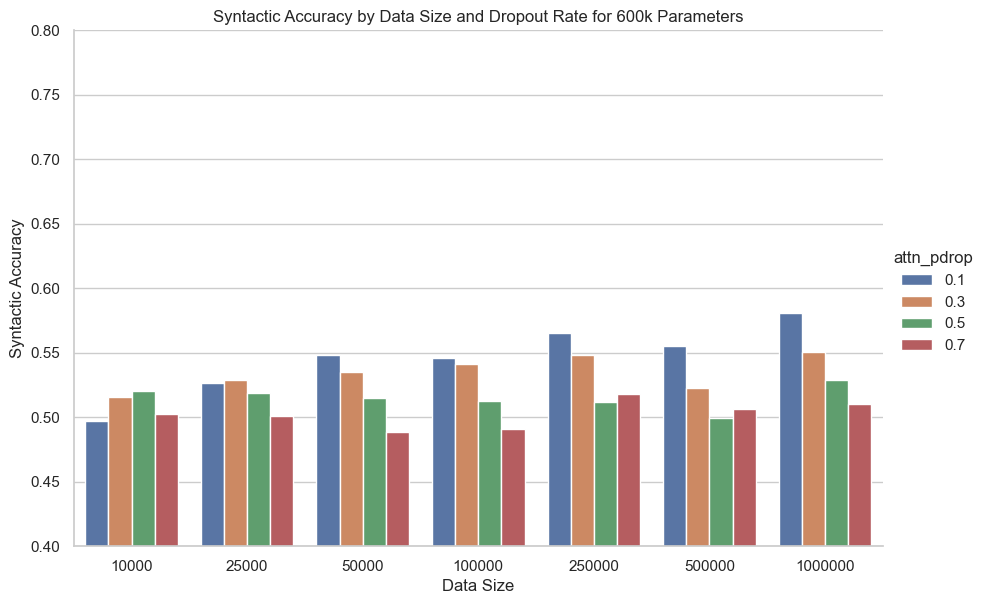

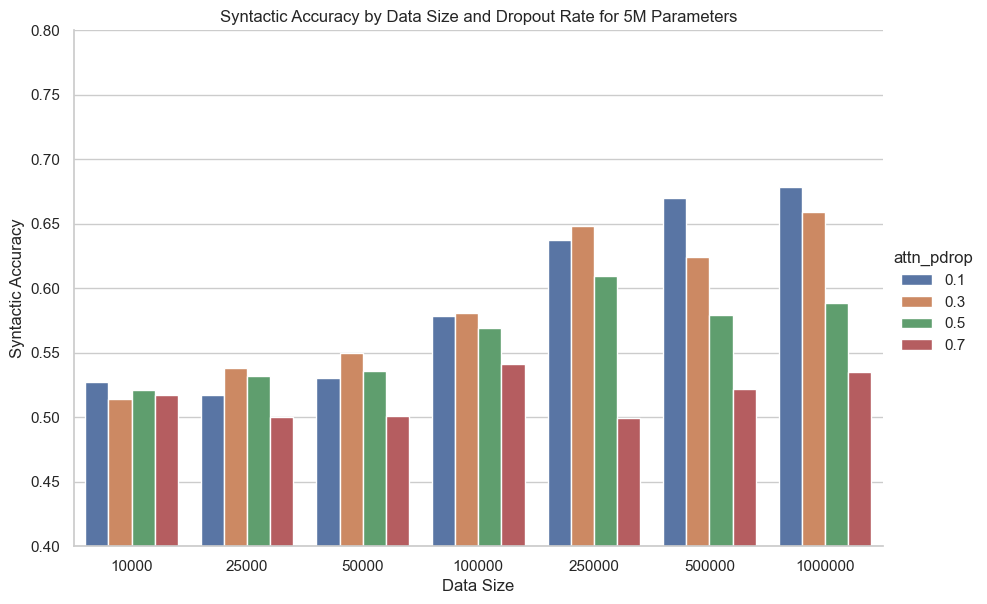

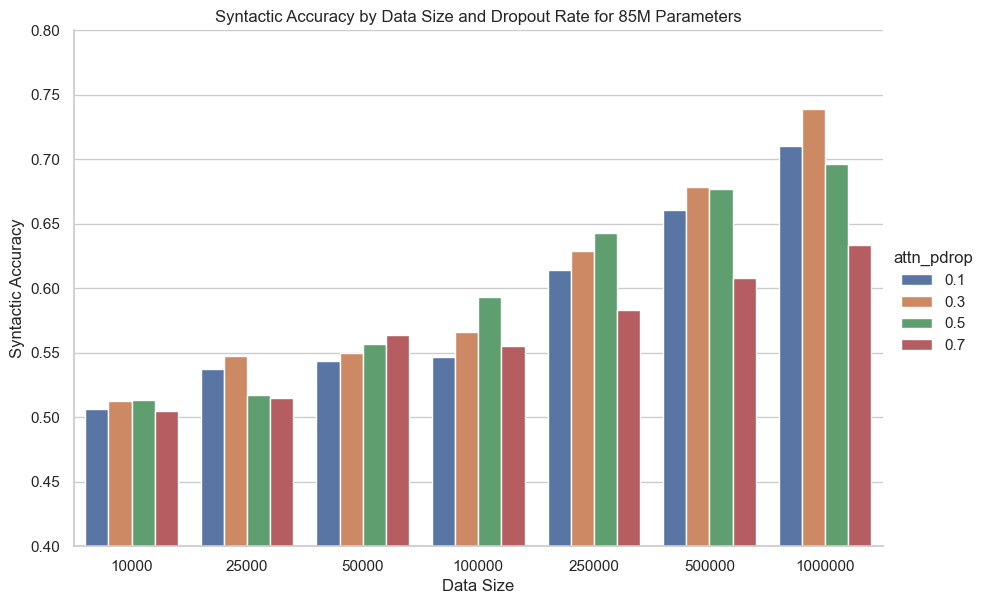

In [35]:
# Plot bar plot of syntactic accuracy for different model sizes, grouped by dropout rate

for num_params in df['num_params'].unique():
    g = sns.catplot(
        data=df[df['num_params'] == num_params],
        x="num_train_examples",
        y="eval/babyslm_syntactic",
        hue="attn_pdrop",
        kind="bar",
        height=6,
        aspect=1.5,
    )

    g.set_axis_labels("Data Size", "Syntactic Accuracy")
    g.set(ylim=(0.4, 0.8))
    plt.title(f"Syntactic Accuracy by Data Size and Dropout Rate for {params_map[num_params]} Parameters")
    plt.show()



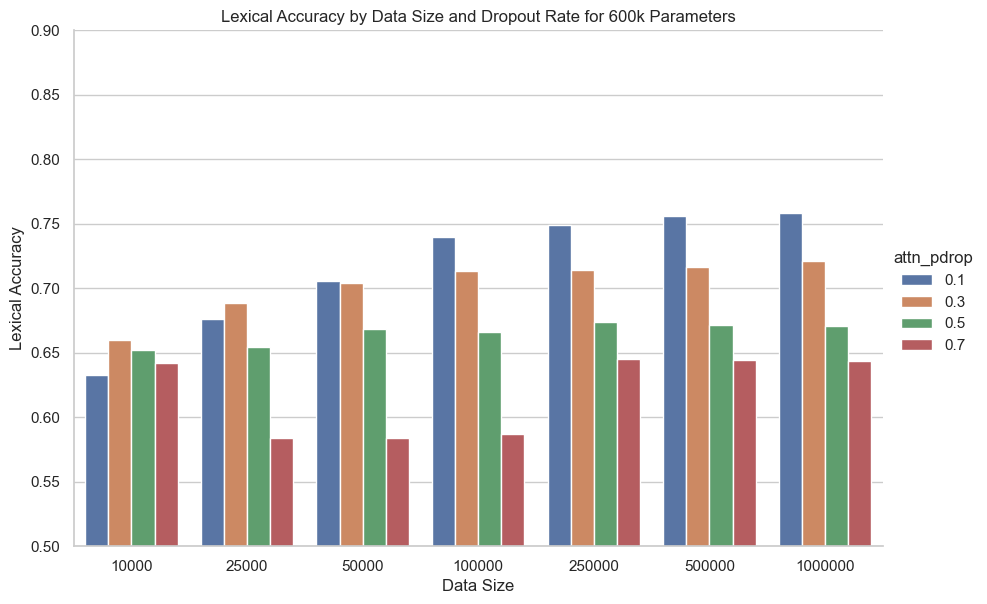

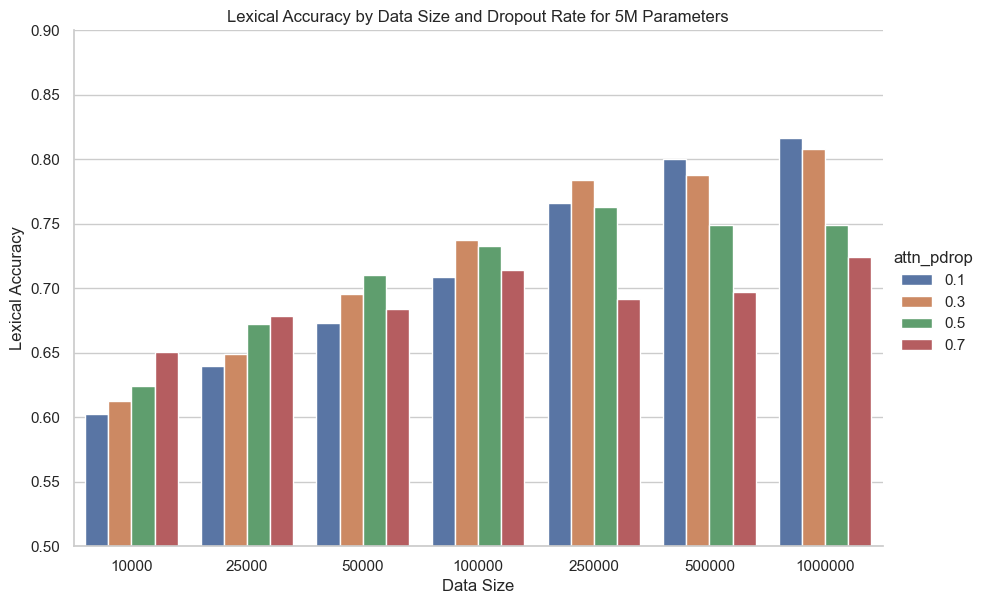

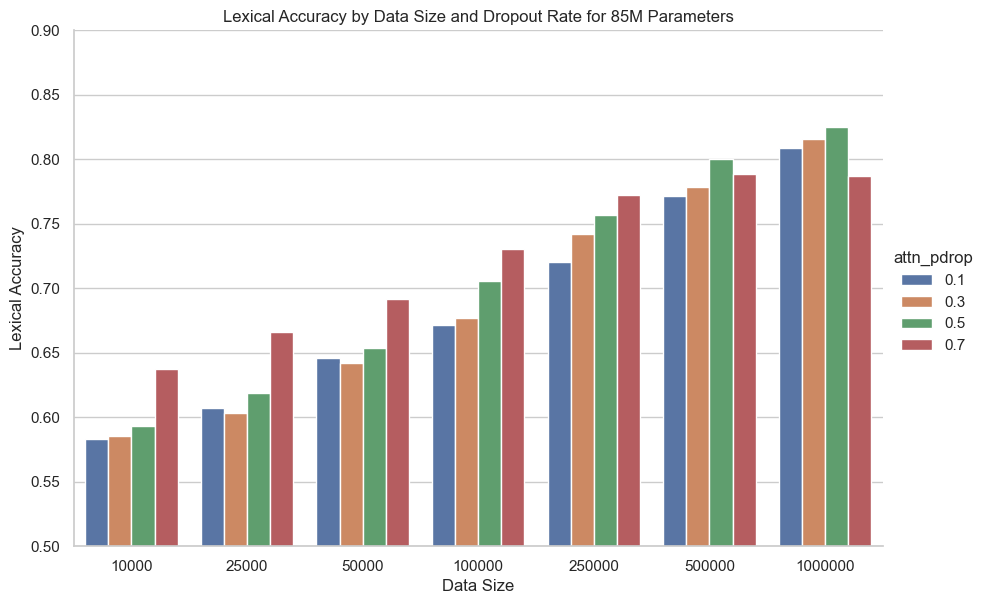

In [36]:
# Plot bar plot of lexical accuracy for different model sizes, grouped by dropout rate

for num_params in df['num_params'].unique():
    g = sns.catplot(
        data=df[df['num_params'] == num_params],
        x="num_train_examples",
        y="eval/babyslm_lexical",
        hue="attn_pdrop",
        kind="bar",
        height=6,
        aspect=1.5,
    )

    g.set_axis_labels("Data Size", "Lexical Accuracy")
    g.set(ylim=(0.5, 0.9))
    plt.title(f"Lexical Accuracy by Data Size and Dropout Rate for {params_map[num_params]} Parameters")
    plt.show()

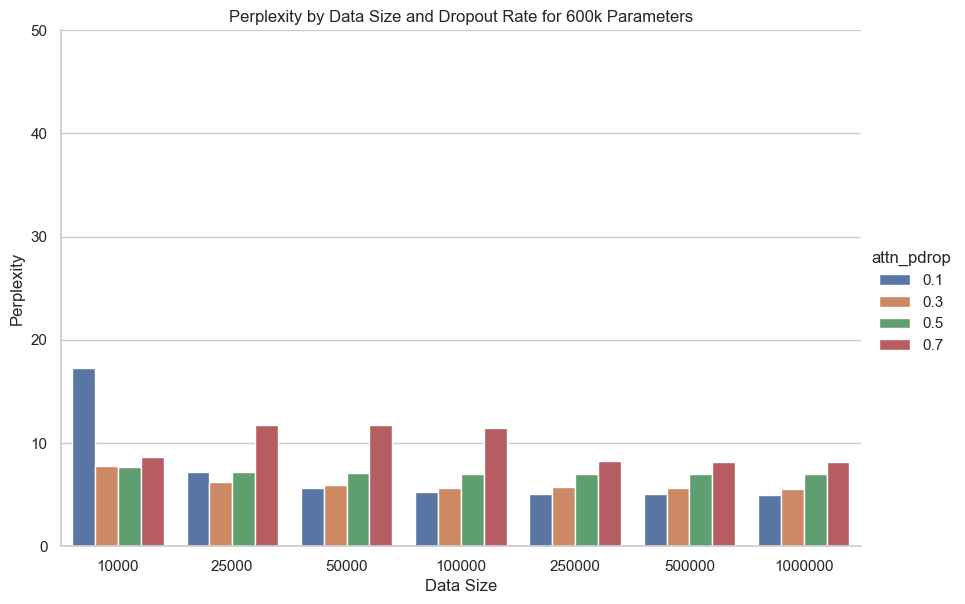

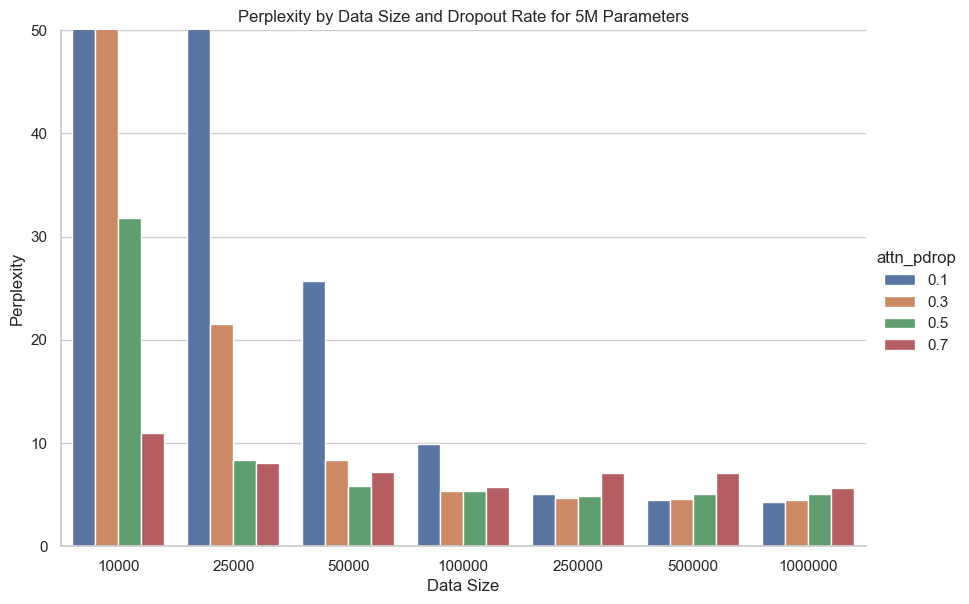

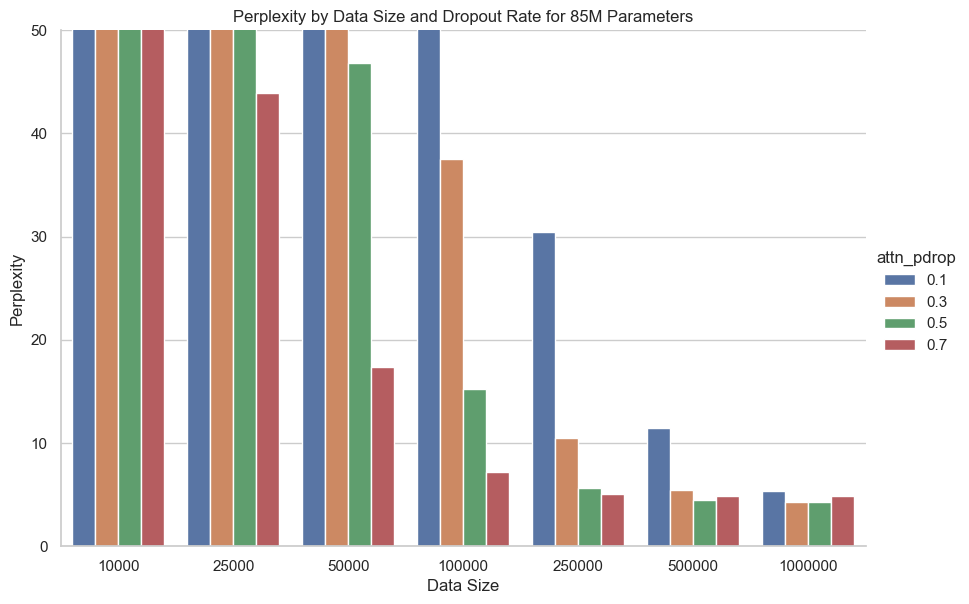

In [37]:
# Plot perplexity 

for num_params in df['num_params'].unique():
    g = sns.catplot(
        data=df[df['num_params'] == num_params],
        x="num_train_examples",
        y="eval/perplexity",
        hue="attn_pdrop",
        kind="bar",
        height=6,
        aspect=1.5,
    )

    g.set_axis_labels("Data Size", "Perplexity")
    g.set(ylim=(0, 50))
    plt.title(f"Perplexity by Data Size and Dropout Rate for {params_map[num_params]} Parameters")
    plt.show()


